In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados agrupados gerados no arquivo tratamento dataset

In [2]:
# Documento CSV de Acidentes 2025 (Agrupados por ocorrência)
df_acidentes_agrupado = pd.read_csv("dados/acidentes/acidentes_agrupado.csv")
df_acidentes_agrupado.head()

C:\Users\pertile\AppData\Local\Temp\1\ipykernel_11364\837903353.py:2: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acidentes_agrupado = pd.read_csv("dados/acidentes/acidentes_agrupado.csv")


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop,origem_arquivo
0,405147.0,911179.0,2022-01-01,sábado,00:10:00,CE,222.0,"2,8",FORTALEZA,Sim,...,0.0,0.0,1.0,0.0,"-3,73911117","-38,58687498",SPRF-CE,DEL01-CE,UOP01-DEL01-CE,acidentes2022_todas_causas_tipos.csv
1,405147.0,911178.0,2022-01-01,sábado,00:10:00,CE,222.0,"2,8",FORTALEZA,Sim,...,1.0,0.0,0.0,0.0,"-3,73911117","-38,58687498",SPRF-CE,DEL01-CE,UOP01-DEL01-CE,acidentes2022_todas_causas_tipos.csv
2,405149.0,912793.0,2022-01-01,sábado,01:30:00,PE,104.0,63,CARUARU,Não,...,0.0,0.0,1.0,0.0,"-8,2698","-35,9803",SPRF-PE,DEL02-PE,UOP01-DEL02-PE,acidentes2022_todas_causas_tipos.csv
3,405149.0,912796.0,2022-01-01,sábado,01:30:00,PE,104.0,63,CARUARU,Não,...,0.0,1.0,0.0,0.0,"-8,2698","-35,9803",SPRF-PE,DEL02-PE,UOP01-DEL02-PE,acidentes2022_todas_causas_tipos.csv
4,405149.0,912788.0,2022-01-01,sábado,01:30:00,PE,104.0,63,CARUARU,Não,...,1.0,0.0,0.0,0.0,"-8,2698","-35,9803",SPRF-PE,DEL02-PE,UOP01-DEL02-PE,acidentes2022_todas_causas_tipos.csv


In [10]:
nomes_colunas = df_acidentes_agrupado.columns.tolist()
print(nomes_colunas)

['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_principal', 'causa_acidente', 'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'origem_arquivo']


# Quantidade de acidentes com vítimas fatais

In [3]:
# Filtra apenas os acidentes com vítimas fatais
fatais = df_acidentes_agrupado[df_acidentes_agrupado['classificacao_acidente'] == 'Com Vítimas Fatais']

# Agrupa por rodovia e conta quantas ocorrências há
resultado = fatais.groupby('br').size().reset_index(name='qtd_acidentes_fatais')

# Ordena do maior pro menor (opcional)
resultado = resultado.sort_values(by='br', ascending=True)

# Exibe o resultado
print(resultado)

        br  qtd_acidentes_fatais
0     10.0                  6907
1     20.0                  9651
2     30.0                   330
3     40.0                 18552
4     50.0                  4049
..     ...                   ...
106  482.0                   171
107  484.0                     7
108  487.0                   283
109  493.0                   776
110  495.0                    39

[111 rows x 2 columns]


C:\Users\adria\AppData\Local\Temp\ipykernel_18376\3620233679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultado, x='br', y='qtd_acidentes_fatais', palette='Reds_r')


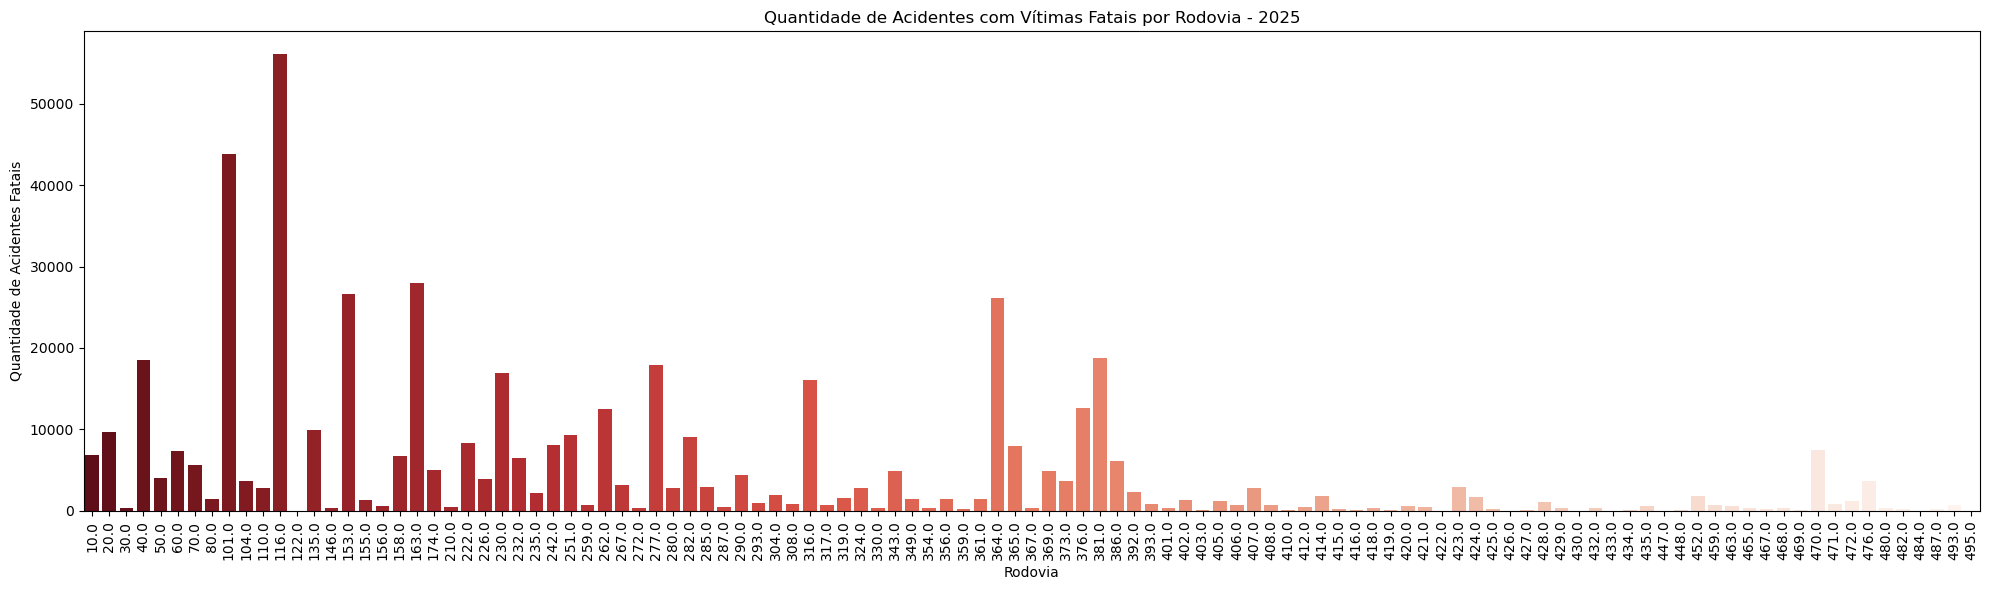

In [4]:
plt.figure(figsize=(20, 6))
sns.barplot(data=resultado, x='br', y='qtd_acidentes_fatais', palette='Reds_r')

plt.title('Quantidade de Acidentes com Vítimas Fatais por Rodovia - 2025')
plt.xlabel('Rodovia')
plt.ylabel('Quantidade de Acidentes Fatais')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Causa de acidentes

C:\Users\adria\AppData\Local\Temp\ipykernel_18376\1153779029.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=causas_df, x='causa_acidente', y='quantidade', palette='Blues_d', ax=ax1)
C:\Users\adria\AppData\Local\Temp\ipykernel_18376\1153779029.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


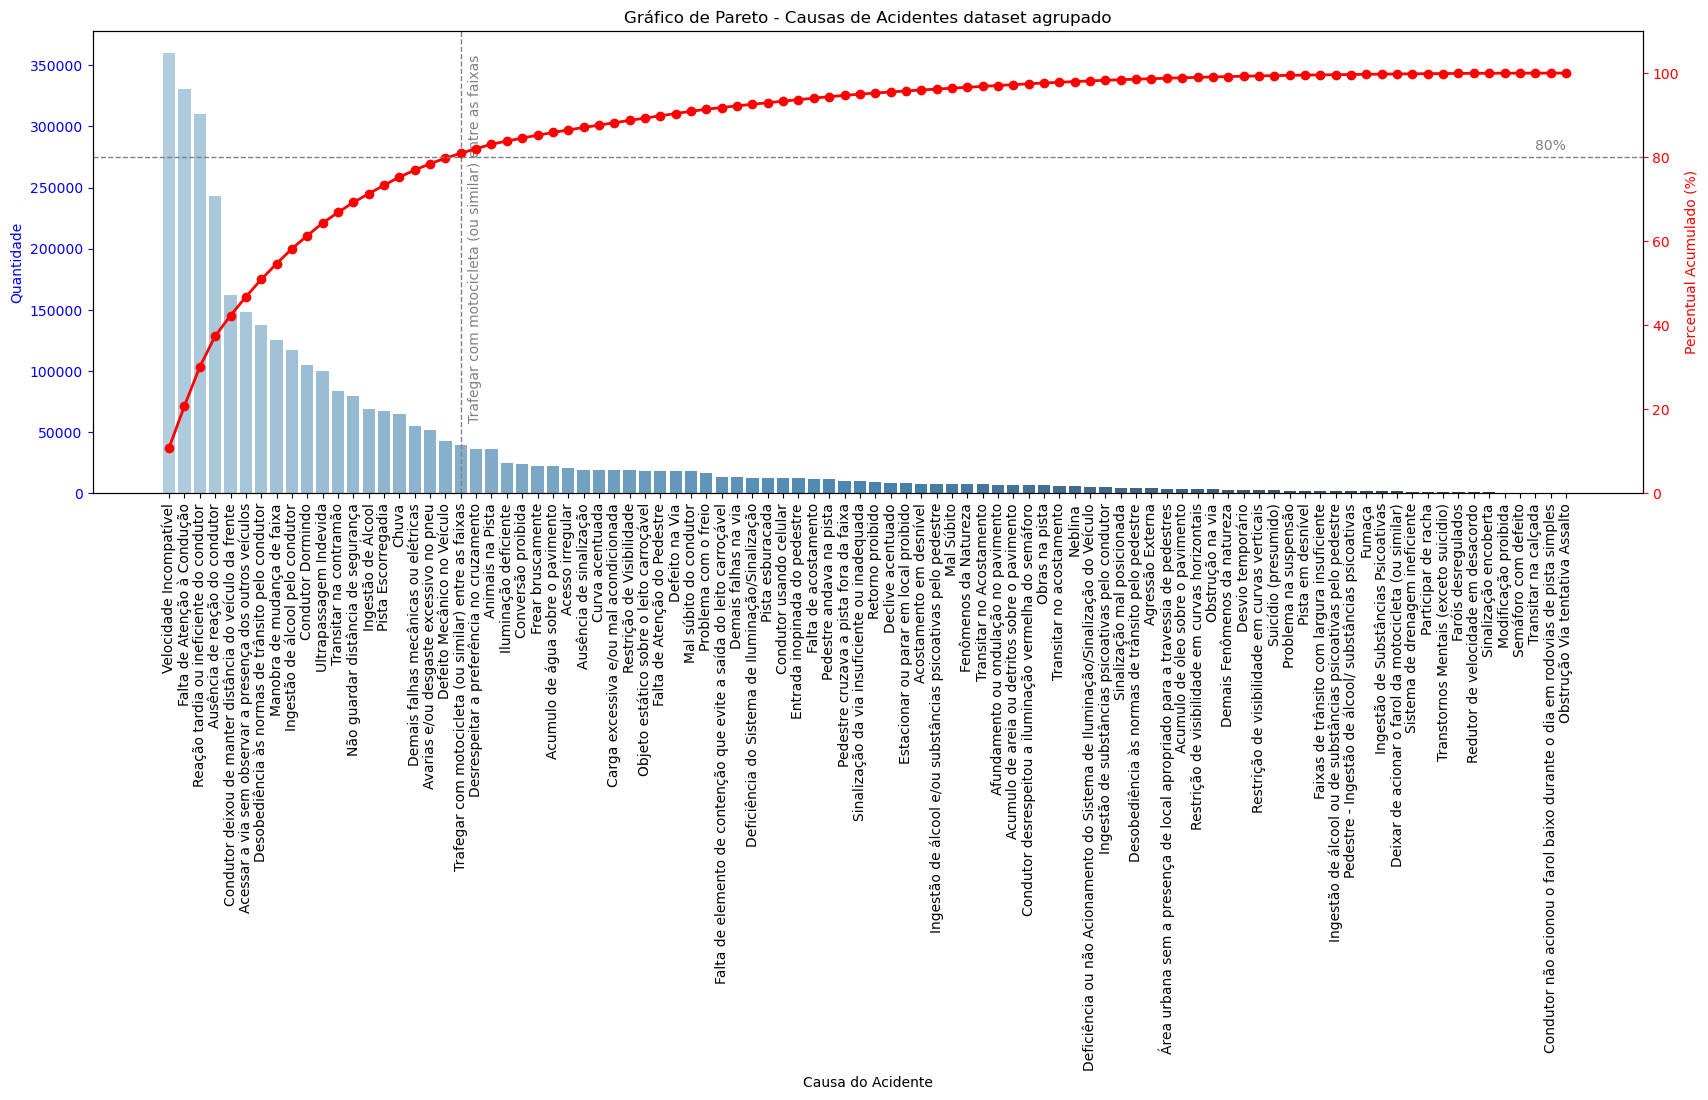

In [5]:
# Agrupamento por causa
causas_df = df_acidentes_agrupado['causa_acidente'].value_counts().reset_index()
causas_df.columns = ['causa_acidente', 'quantidade']

# Calcula percentual acumulado
causas_df['percentual'] = 100 * causas_df['quantidade'].cumsum() / causas_df['quantidade'].sum()

# Encontra a posição onde atinge 80%
idx_80 = causas_df[causas_df['percentual'] >= 80].index[0]
causa_80 = causas_df['causa_acidente'][idx_80]

fig, ax1 = plt.subplots(figsize=(20, 6))

sns.barplot(data=causas_df, x='causa_acidente', y='quantidade', palette='Blues_d', ax=ax1)
ax1.set_xlabel('Causa do Acidente')
ax1.set_ylabel('Quantidade', color='blue')
ax1.tick_params('y', colors='blue')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(causas_df['causa_acidente'], causas_df['percentual'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Percentual Acumulado (%)', color='red')
ax2.tick_params('y', colors='red')
ax2.set_ylim(0, 110)

ax2.axhline(80, color='gray', linestyle='--', linewidth=1)
ax2.text(len(causas_df) - 1, 81, '80%', color='gray', ha='right', va='bottom')

ax1.axvline(idx_80, color='gray', linestyle='--', linewidth=1)
ax1.text(idx_80 + 0.5, ax1.get_ylim()[1]*0.95, f'{causa_80}', rotation=90, color='gray', va='top')

plt.title('Gráfico de Pareto - Causas de Acidentes dataset agrupado')

plt.tight_layout()
plt.show()

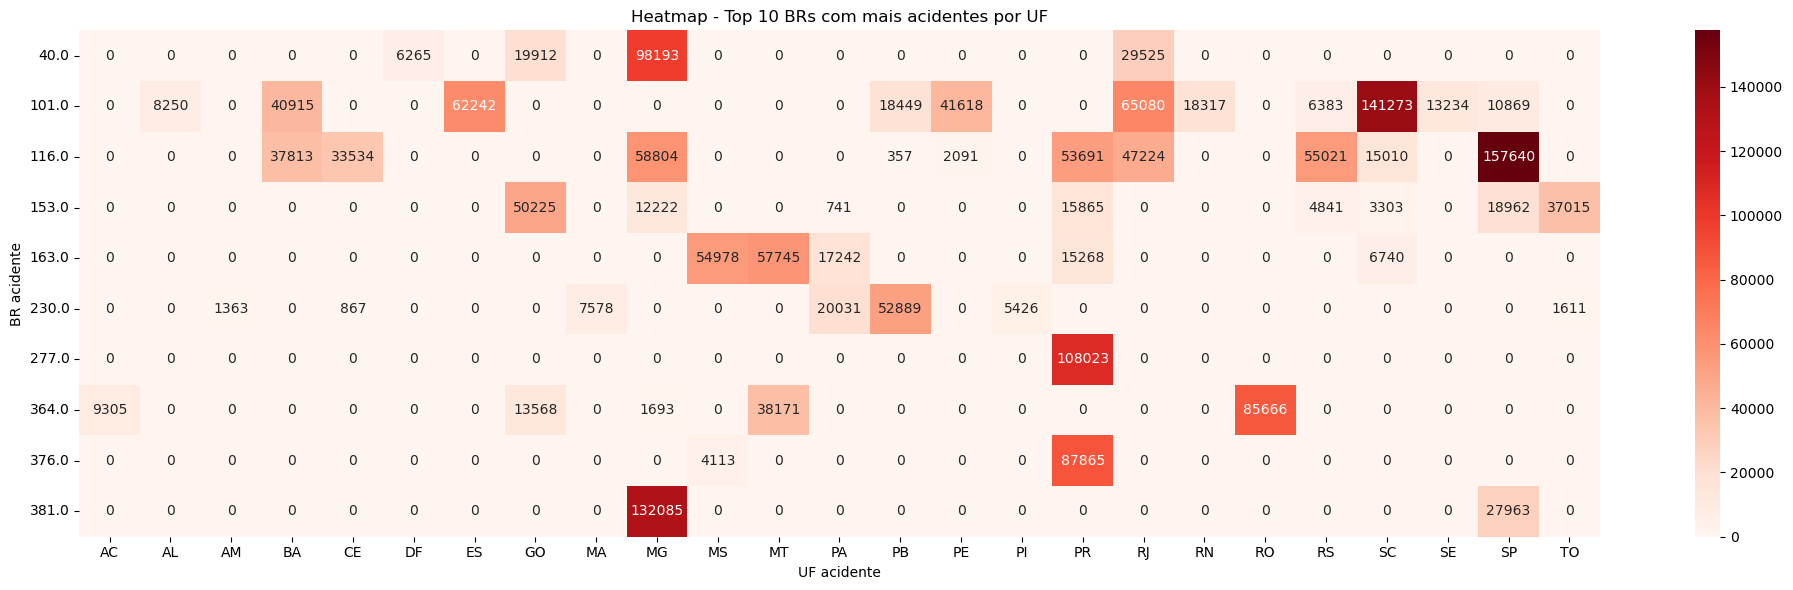

In [6]:
# Agrupamento por BR e UF
agrupado = df_acidentes_agrupado.groupby(['br', 'uf']).size().reset_index(name='quantidade')

# Filtra as 10 BRs com mais infrações totais
top_brs = (
    agrupado.groupby('br')['quantidade']
    .sum()
    .nlargest(10)
    .index
)
filtrado = agrupado[agrupado['br'].isin(top_brs)]

pivot_df = filtrado.pivot(index='br', columns='uf', values='quantidade').fillna(0)

plt.figure(figsize=(20, 6))
sns.heatmap(pivot_df, annot=True, fmt='g', cmap='Reds')

plt.title('Heatmap - Top 10 BRs com mais acidentes por UF')
plt.xlabel('UF acidente')
plt.ylabel('BR acidente')
#plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

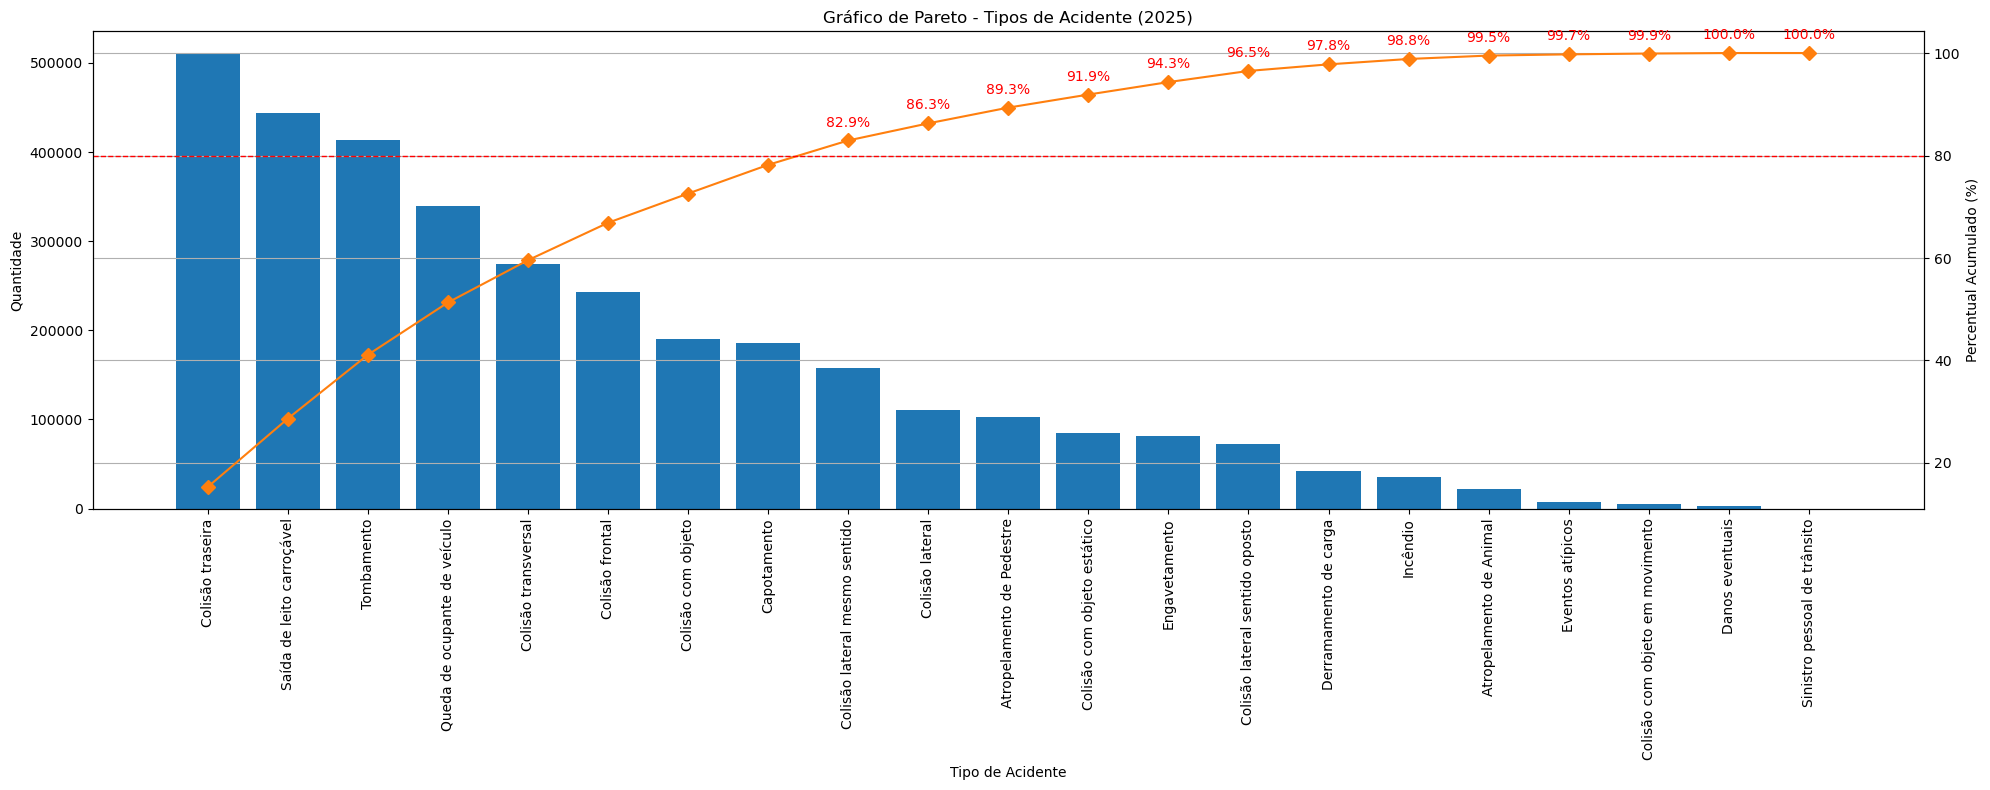

In [7]:
vc = df_acidentes_agrupado['tipo_acidente'].value_counts()
pareto_df = vc.reset_index()
pareto_df.columns = ['tipo_acidente', 'quantidade']

pareto_df['percent'] = 100 * pareto_df['quantidade'] / pareto_df['quantidade'].sum()
pareto_df['percent_acumulado'] = pareto_df['percent'].cumsum()

fig, ax = plt.subplots(figsize=(20,8))

ax.bar(range(len(pareto_df)), pareto_df['quantidade'], color='C0')

ax2 = ax.twinx()
ax2.plot(range(len(pareto_df)), pareto_df['percent_acumulado'], color='C1', marker='D', ms=7)
ax2.axhline(80, color='r', linestyle='--', linewidth=1)
ax2.set_ylabel('Percentual Acumulado (%)')

ax.set_xlabel('Tipo de Acidente')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Pareto - Tipos de Acidente (2025)')

ax.set_xticks(range(len(pareto_df)))
ax.set_xticklabels(pareto_df['tipo_acidente'], rotation=90)

plt.grid(axis='y')

for i, perc in enumerate(pareto_df['percent_acumulado']):
    if perc >= 80:
        ax2.annotate(f'{perc:.1f}%', (i, perc), textcoords="offset points", xytext=(0,10), ha='center', color='red')

plt.tight_layout()
plt.show()

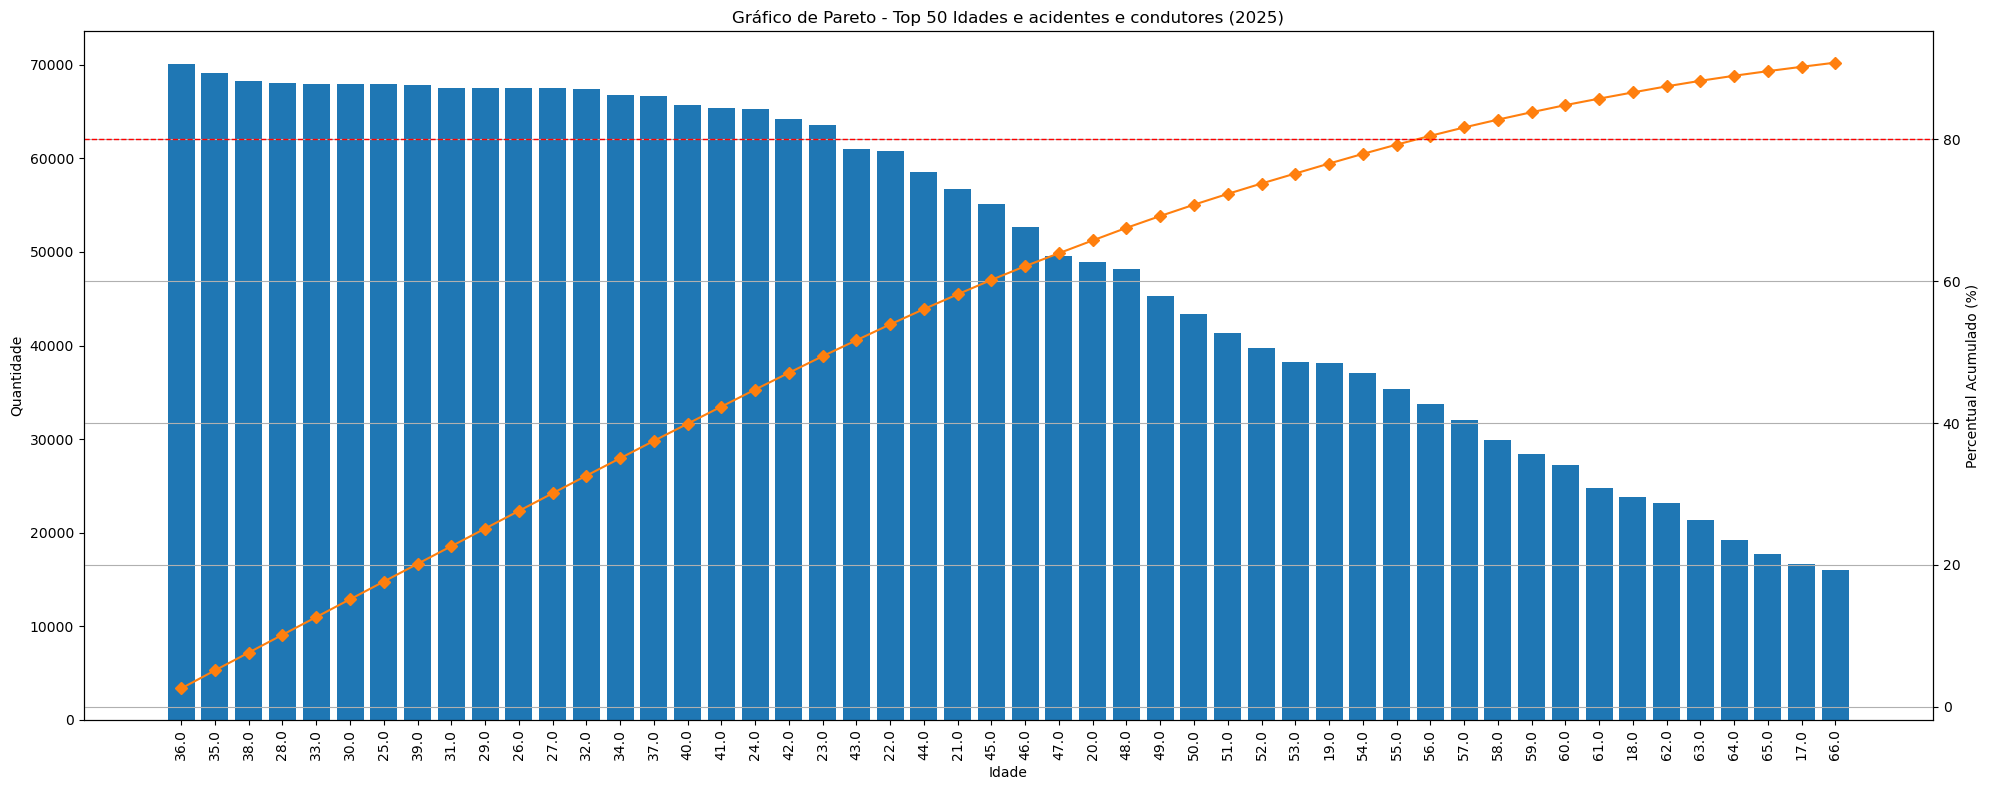

In [8]:
vc = df_acidentes_agrupado['idade'].value_counts()
pareto_df = vc.reset_index()
pareto_df.columns = ['idade', 'quantidade']

pareto_df['percent'] = 100 * pareto_df['quantidade'] / pareto_df['quantidade'].sum()
pareto_df['percent_acumulado'] = pareto_df['percent'].cumsum()

# 🔽 Filtra apenas as 30 idades mais frequentes
pareto_top30 = pareto_df.head(50)

# Gráfico de Pareto
fig, ax = plt.subplots(figsize=(20, 8))

ax.bar(range(len(pareto_top30)), pareto_top30['quantidade'], color='C0')

ax2 = ax.twinx()
ax2.plot(range(len(pareto_top30)), pareto_top30['percent_acumulado'], color='C1', marker='D')
ax2.axhline(80, color='r', linestyle='--', linewidth=1)
ax2.set_ylabel('Percentual Acumulado (%)')

ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade')
ax.set_title('Gráfico de Pareto - Top 50 Idades e acidentes e condutores (2025)')

ax.set_xticks(range(len(pareto_top30)))
ax.set_xticklabels(pareto_top30['idade'], rotation=90)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Infrações agrupadas

In [3]:
# Documento CSV de Acidentes 2025 (Agrupados por ocorrência)
df_infracoes_agrupado = pd.read_csv("dados/infracoes/infracoes_agrupado.csv")
df_infracoes_agrupado.head()

C:\Users\pertile\AppData\Local\Temp\1\ipykernel_11364\21668501.py:2: DtypeWarning: Columns (15,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_infracoes_agrupado = pd.read_csv("dados/infracoes/infracoes_agrupado.csv")


,Número do Auto,Data da Infração (DD/MM/AAAA),Indicador de Abordagem,Assinatura do Auto,Sentido Trafego,UF Infração,BR Infração,Km Infração,Município,Indicador Veiculo Estrangeiro,...,Descrição Abreviada Infração,Enquadramento da Infração,Início Vigência da Infração,Fim Vigência Infração,Medição Infração,Hora Infração,Medição Considerada,Excesso Verificado,Qtd Infrações,origem_arquivo
0,61eabcb9b7e0679,2022-01-14,C,S,D,MA,230,404,BALSAS,N,...,Conduzir o veículo que não esteja registrado,230 * V,2016-11-01,NaN,Nenhuma,16,0,0,1.0,infraçoes2022_01.csv
1,d97a34e658d2e6c,2022-01-30,C,N,D,MA,230,413,BALSAS,N,...,Dirigir veículo sem possuir CNH/PPD/ACC,162 I,2016-11-01,NaN,Nenhuma,17,0,0,1.0,infraçoes2022_01.csv
2,397168b4d993a8f,2022-01-30,C,N,D,MA,230,413,BALSAS,N,...,Permitir posse/condução do veículo a pessoa se...,164 c/c 162 I,2016-11-01,NaN,Nenhuma,17,0,0,1.0,infraçoes2022_01.csv
3,a86157cf8d604d0,2022-01-21,C,N,D,PR,277,31,MORRETES,N,...,Conduzir o veículo registrado que não esteja d...,230 * V,2016-11-01,NaN,Nenhuma,12,0,0,1.0,infraçoes2022_01.csv
4,1302ba8ba04bb2f,2022-01-24,C,S,D,MG,40,554,NOVA LIMA,N,...,Conduzir o veículo que não esteja registrado,230 * V,2016-11-01,NaN,Nenhuma,17,0,0,1.0,infraçoes2022_01.csv


In [7]:
nomes_colunas = df_infracoes_agrupado.columns.tolist()
print(nomes_colunas)

['Número do Auto', 'Data da Infração (DD/MM/AAAA)', 'Indicador de Abordagem', 'Assinatura do Auto', 'Sentido Trafego', 'UF Infração', 'BR Infração', 'Km Infração', 'Município', 'Indicador Veiculo Estrangeiro', 'UF Placa', 'Descrição Especie Veículo', 'Descrição Marca Veículo', 'Descrição Tipo Veículo', 'Descrição Modelo Veiculo', 'Código da Infração', 'Descrição Abreviada Infração', 'Enquadramento da Infração', 'Início Vigência da Infração', 'Fim Vigência Infração', 'Medição Infração', 'Hora Infração', 'Medição Considerada', 'Excesso Verificado', 'Qtd Infrações', 'origem_arquivo']


In [8]:
df_infracoes_agrupado['BR Infração'].value_counts()


BR Infração
101    5764835
116    4487670
163    1150459
40     1100821
153     898227
        ...   
363          2
491          2
455          2
383          2
377          1
Name: count, Length: 133, dtype: int64

In [9]:
df_infracoes_agrupado['Descrição Tipo Veículo'].value_counts()

Descrição Tipo Veículo
AUTOMOVEL            9904044
CAMINHONETE          2964698
CAMINHAO             2216995
MOTOCICLETA          1580819
CAMINHAO TRATOR      1494159
CAMIONETA            1027130
UTILITARIO            927338
SEMI-REBOQUE          896218
MOTOCICLO             364378
MOTONETA              236181
ONIBUS                187593
REBOQUE               176459
CAMINHONETA           169692
MICROONIBUS           140202
Não informado         115986
NAO INFORMADO          60687
CICLOMOTOR             25136
MOTOR-CASA              9773
Não encontrado          4812
TRATOR DE RODAS         1859
TRICICLO                1490
C. TRATOR                315
BONDE                    120
TRATOR DE ESTEIRA         72
CARROCA                   46
CAMINHAO TANQUE           46
TRATOR MISTO              43
SIDE-CAR                  33
CHARRETE                  28
QUADRICICLO               11
CHASSI/PLATAFORMA          5
BICICLETA                  1
Name: count, dtype: int64

In [10]:
df_infracoes_agrupado['Código da Infração'].value_counts()

Código da Infração
74550    10983883
74630     1875881
59670      717902
65992      692959
58350      471770
           ...   
51261           1
63430           1
60093           1
52312           1
71291           1
Name: count, Length: 638, dtype: int64

In [12]:
df_infracoes_agrupado['Hora Infração'].value_counts()

Hora Infração
10    2171666
16    1913050
11    1779361
9     1739978
15    1718284
17    1587907
14    1279008
8     1202708
12    1006473
13     986104
18     985373
7      836744
19     715826
21     687768
20     671273
22     599852
6      550820
23     447029
5      385974
0      334318
4      282844
1      245382
3      207462
2      200038
Name: count, dtype: int64

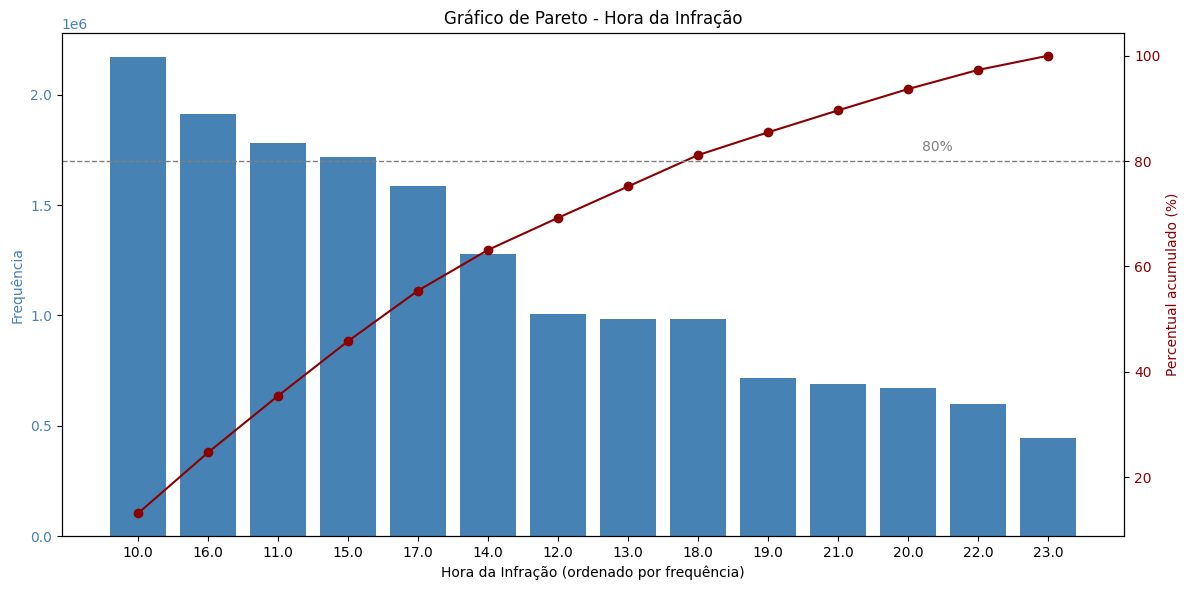

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Padronizar a coluna 'Hora Infração'
def extrair_hora(valor):
    if pd.isnull(valor):
        return None
    valor = str(valor).strip().lower().replace("h", ":").replace(" ", "")
    if ":" in valor:
        try:
            return int(valor.split(":")[0])
        except:
            return None
    elif len(valor) >= 2:
        try:
            return int(valor[:2])
        except:
            return None
    return None

df = df_infracoes_agrupado.copy()
df["hora_limpa"] = df["Hora Infração"].apply(extrair_hora)

# 2. Contagem por hora, ordenada da maior para menor (pareto)
contagem = df["hora_limpa"].value_counts().sort_values(ascending=False)
porcentagem_acumulada = contagem.cumsum() / contagem.sum() * 100

# 3. Gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras (frequência)
ax1.bar(contagem.index.astype(str), contagem.values, color="steelblue")
ax1.set_ylabel("Frequência", color="steelblue")
ax1.tick_params(axis="y", labelcolor="steelblue")
ax1.set_xlabel("Hora da Infração (ordenado por frequência)")
ax1.set_title("Gráfico de Pareto - Hora da Infração")

# Linha acumulada (%)
ax2 = ax1.twinx()
ax2.plot(contagem.index.astype(str), porcentagem_acumulada, color="darkred", marker="o")
ax2.set_ylabel("Percentual acumulado (%)", color="darkred")
ax2.tick_params(axis="y", labelcolor="darkred")
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(contagem) * 0.8, 82, "80%", color="gray")

plt.tight_layout()
plt.show()
